In [1]:
import numpy as np

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Exploring the dataset

In [2]:
# train = pd.read_csv("data/small_train.csv")
# test = pd.read_csv("data/small_test.csv")
# train = pd.read_csv("data/politicians_train.csv")
# test = pd.read_csv("data/politicians_test.csv")

train = pd.read_csv("data/education_train.csv")
test = pd.read_csv("data/education_test.csv")
train.head()

,M1,M2,M3,M4,M5,P1,P2,P3,P4,F,grade
0,notA,notA,A,notA,A,A,A,notA,notA,A,A
1,notA,A,A,notA,A,notA,notA,notA,A,notA,notA
2,notA,A,A,A,A,notA,A,notA,notA,A,A
3,notA,notA,notA,notA,A,A,A,notA,notA,A,notA
4,A,notA,A,A,A,A,A,notA,notA,A,A


Dataset contains categorical data with 2 categories for each feature. These features need to be encoded for which ordinal encoder from scikit-learn can be used

In [3]:
encoder = OrdinalEncoder()
encoded_train = encoder.fit_transform(train)
encoded_test = encoder.transform(test)
encoded_train[:5,:]
encoded_train.shape, encoded_test.shape

((200, 11), (200, 11))

The dataset can be separated into features and labels for training the decision tree using sklearn decision tree classifier

In [4]:
x_train, y_train = encoded_train[:,:-1], encoded_train[:,-1]
x_test, y_test = encoded_test[:,:-1], encoded_test[:,-1]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((200, 10), (200,), (200, 10), (200,))

In [5]:
model = DecisionTreeClassifier(criterion="entropy",max_depth=6)
mod = model.fit(x_train, y_train)

In [6]:
predictions = mod.predict(x_train)
accuracy_score(y_train, predictions)

0.95

In [7]:
predictions = mod.predict(x_test)
accuracy_score(y_test, predictions)

0.92

In [8]:
from sklearn import tree
tree.export_graphviz(mod,out_file='tree.dot',feature_names=train.columns[:-1])

In [9]:
!dot -Tpng tree.dot -o tree.png 

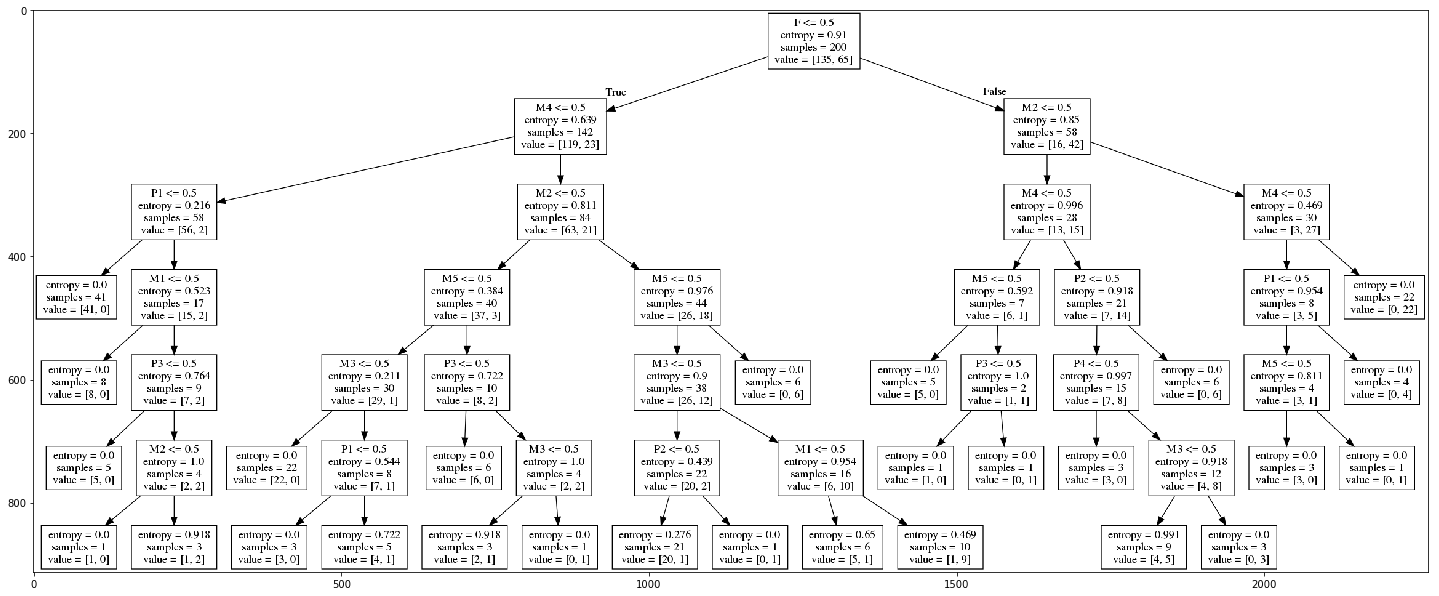

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=[25,25])
img=mpimg.imread('tree.png')
imgplot = plt.imshow(img)
plt.show()